# Обработка изображений. Часть 2.
Данные, необходимые для этого модуля:
* cat-bw.png
* cat-color.png
* coin.png

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

## Загрузка цветного изображения

In [2]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
print(img.shape)

(667, 730, 3)


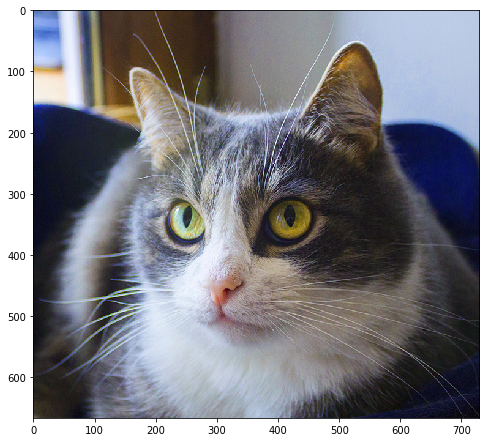

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Линейное уменьшение яркости

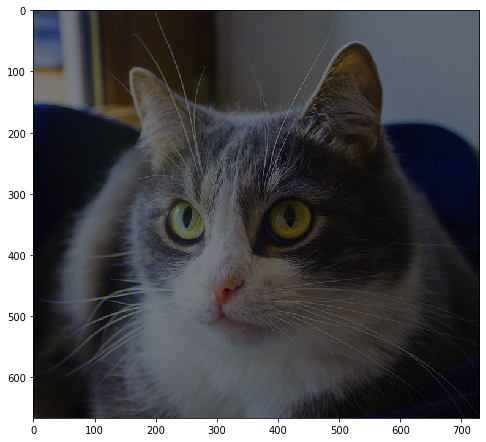

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img/2)

## Линейное увеличение яркости
Возможен выход за пределы допустимого диапазона


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


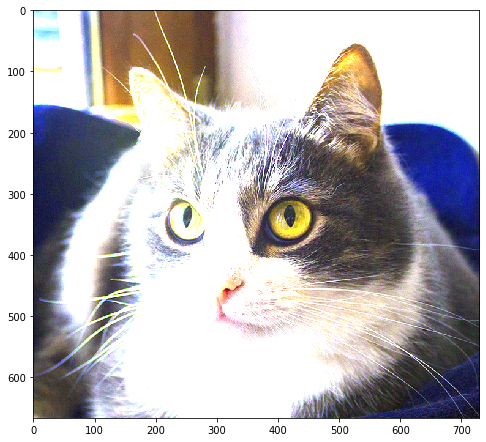

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img*2)

## Нелинейное уменьшение яркости

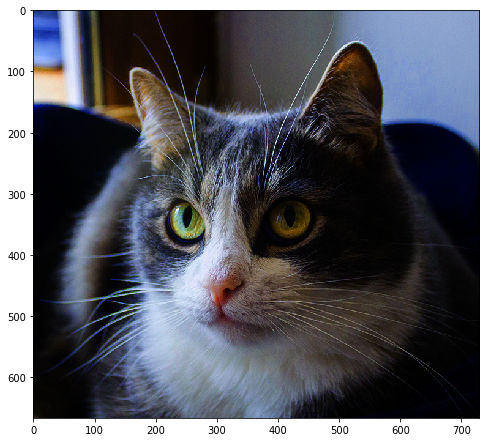

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2) # возведение в квадрат

## Нелинейное увеличение яркости

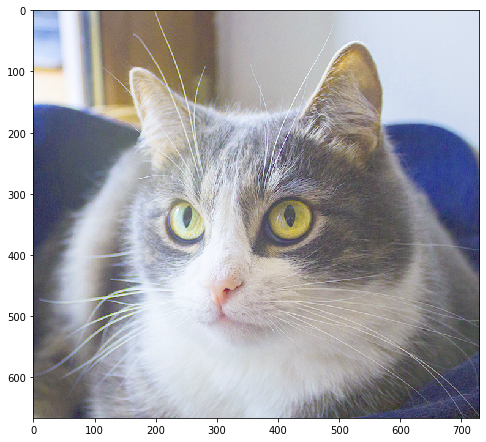

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5) # извлечение квадратного корня

## Получение ЧБ изображения по цветному

In [0]:
# находим среднее по 2-й оси
# канал 0 - высота, 1 - ширина, 2 - цыетовые каналы
img_bw = np.mean(img, axis=2)

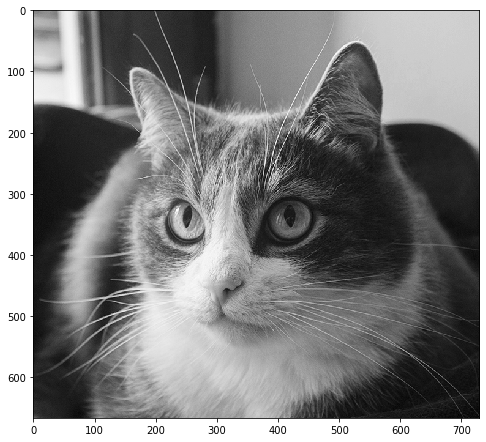

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

## Цветовое пространство HSV

Hue Saturation Value
- Hue - тон: 0
- Saturation - насыщеность: 1
- Value - интенсивность (ярче/темнее): 2

In [0]:
from skimage.color import rgb2hsv, hsv2rgb

In [0]:
# переходим к другому цветному пространству
img_hsv = rgb2hsv(img)

In [13]:
# тон, насыщенность, интенсивность
img_hsv[:5, :5, :]

array([[[0.61702126, 0.5136612 , 0.7176471 ],
        [0.6180555 , 0.51891893, 0.7254902 ],
        [0.6088435 , 0.5297297 , 0.7254902 ],
        [0.6088435 , 0.5240642 , 0.73333335],
        [0.61702126, 0.5136612 , 0.7176471 ]],

       [[0.6185567 , 0.53296703, 0.7137255 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6175439 , 0.5248619 , 0.70980394]],

       [[0.6185567 , 0.5388889 , 0.7058824 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.51336896, 0.73333335],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6088435 , 0.5355191 , 0.7176471 ]],

       [[0.6111111 , 0.5238095 , 0.7411765 ],
        [0.6116667 , 0.52910054, 0.7411765 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.6088435 , 0.5212766 , 0.7372549 ]],

       [[0.6094771 , 0.5396825 , 0.7411765 ],
        [0.60891086, 0.534

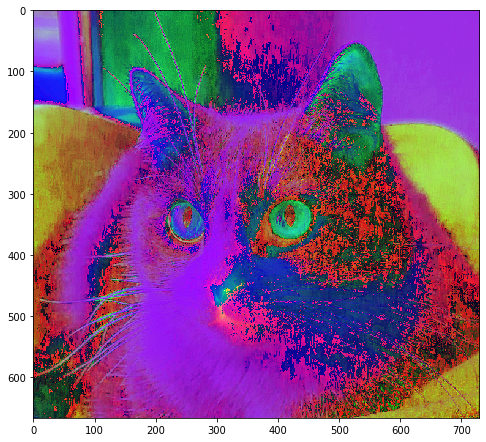

In [14]:
# imshow будет трактовать значения как RGB
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

Однако в этом пространстве мы можем делать разные манипуляции.

## Линейное уменьшение насыщенности

In [0]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

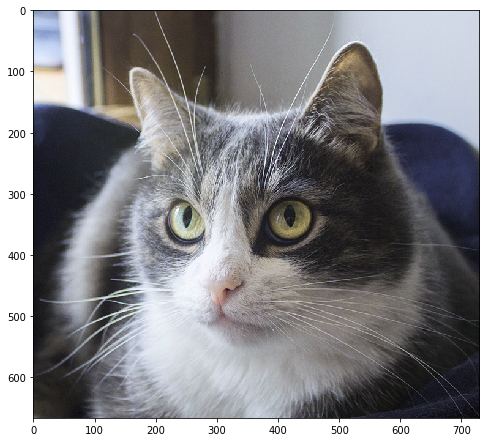

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Линейное увеличение насыщенности
Возможен выход за пределы допустимого диапазона

In [0]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 2
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


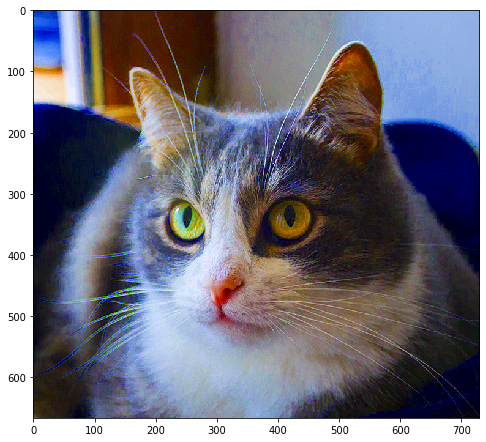

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Изменение тона

In [0]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 2
img_new = hsv2rgb(img_hsv_new)

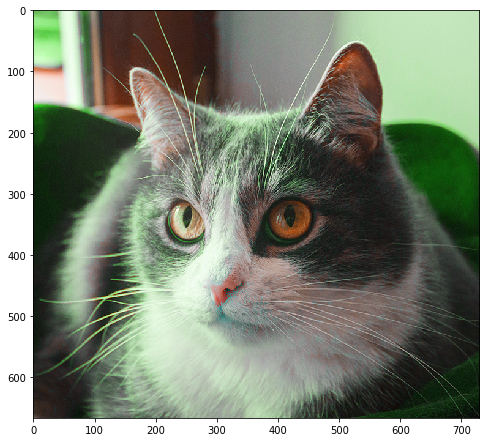

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Бинаризация по порогу

Простая реализация задачи сегментации

In [0]:
img = imageio.imread('coin.png')
img = img.astype(np.float32) / 255.

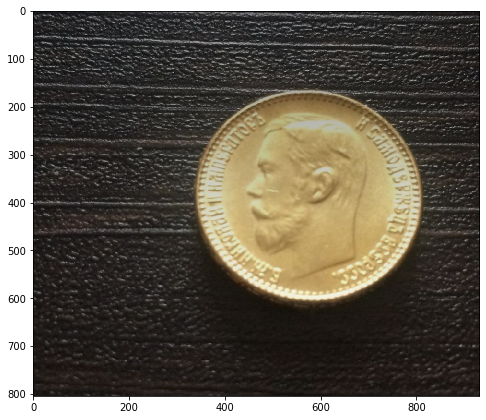

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [0]:
threshold = 0.45 # порог бинаризации
# переходи к градациям серого
img_bw = np.mean(img, axis=2)
# numpy выдаст 2-мерную матрицу где в каждом элементе значение будет True или False
# в хависимости от того, было исходное значение больше порога или меньше
# далее True/False преобразуем в int8 -> нули и единицы
img_bin = (img_bw > threshold).astype(np.uint8)

In [24]:
img_bin[:5, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

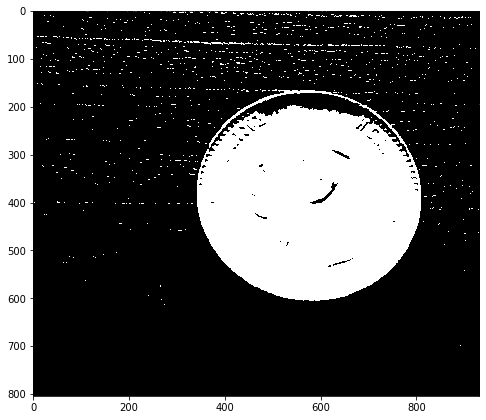

In [25]:
plt.figure(figsize=(8, 8))
# нужно умножить на 255, иначе imshow подумает что 0 и 1 - это два очень тёмных цвета
plt.imshow(img_bin*255, cmap='gray')